In [1]:
from config import load_config
from diffusion import get_samples, get_and_save_samples


config = load_config()
config.ddpm.model_name = "true"
config.ddpm.parametrization = "score"
config.sample.n_samples = 40
config.sample.n_repeats = 1500

samples = get_and_save_samples(config)

/home/coder/.local/lib/python310-conda-cuda-torch21/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1499/1499 [1:13:15<00:00,  2.93s/it]


In [2]:
from utils import get_data_tensor, LeNet, extract_features_statistics, compute_fid
import torch


train_data = get_data_tensor(config)

In [3]:
lenet = LeNet(1024, 10).cuda()
lenet.load_state_dict(torch.load("checkpoints/lenet_mnist.pth"))

mu, sigma = extract_features_statistics(train_data.cuda(), lenet)
mu_diff, sigma_diff = extract_features_statistics(samples["x"].cuda(), lenet)
compute_fid(mu, sigma, mu_diff, sigma_diff + 1e-7)

(0.35479403, 0.7654394323942016, 1.1202334578153441)

In [4]:
import numpy as np


mu_diff, sigma_diff = extract_features_statistics(train_data[np.random.choice(range(len(train_data)), size=(len(samples["x"]),), replace=True)].cuda(), lenet)
compute_fid(mu, sigma, mu_diff, sigma_diff + 1e-7)

(0.012510011, 0.04625432239791505, 0.058764333370534105)

In [5]:
import matplotlib.pyplot as plt

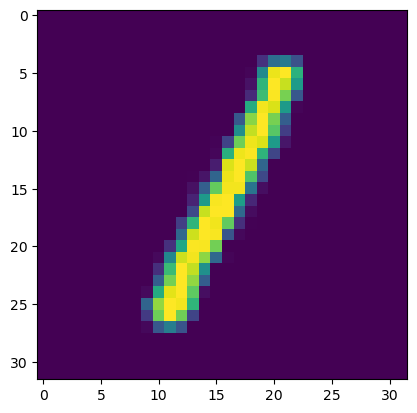

In [6]:
plt.imshow(samples["x"][2, 0])

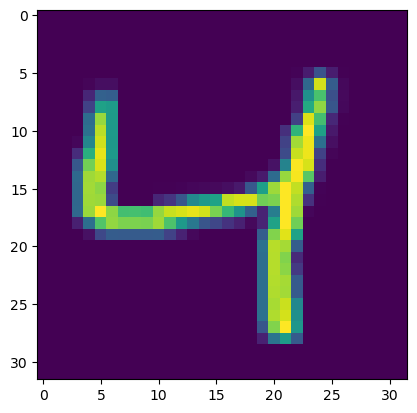

In [7]:
plt.imshow(train_data[2, 0])